In [58]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 2.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 35.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
telco_base_data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
telco_base_data.head()

In [ ]:
telco_base_data.shape

In [ ]:
telco_base_data.columns.values

In [ ]:
telco_base_data.dtypes

In [ ]:
telco_base_data.describe()

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02)

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data["Churn"])

In [ ]:
telco_base_data['Churn'].value_counts()

- **The dataset is highly imbalanced with a ratio of 73:27.**

- **We analyze the data with other features while keeping the target values separate to gain deeper insights.**

- **To correct this imbalance, we can perform either:**
  - **Upsampling** (increasing samples of the minority class)
  - **Downsampling** (reducing samples of the majority class)


In [ ]:
telco_base_data.info(verbose=True)

In [ ]:
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['column', 'percent_missing']  # rename for clarity
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percent_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column")
plt.show()


- **Missing Data – Initial Intuition:**  
  - **There is no missing data in this dataset.**

- **General Thumb Rules:**
  - **For features with fewer missing values:**  
    - Use regression to predict the missing values, or  
    - Fill them with the mean (or median) of the existing values, depending on the feature type.
  - **For features with a large number of missing values:**  
    - It is better to drop those columns as they provide limited insight for analysis.

- **Important Consideration:**  
  - There’s no strict rule for deleting columns with high missing values, but generally, you can drop them if more than **30–40% of data is missing**.  
  - However, context matters — for example:  
    - **`Is_Car`** and **`Car_Type`** → People without cars will naturally have `Car_Type = NaN`.  
    - In such cases, the column still carries valuable information, so **decisions should be made wisely.**


## **Data Cleaning**


In [ ]:
telco_data=telco_base_data

In [ ]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

**Since NA is very low, it’s safe to drop it.**


In [ ]:
telco_data.dropna(how='any',inplace=True)

**Divide customers into bins based on tenure eg for tenure <12 months; assign a tenure group if 1-12, for tenure between 1 to 2 years , tenure group of 13-24 ; so on ..**

In [ ]:
print(telco_data['tenure'].max())


In [ ]:
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

telco_data['tenure_group']=pd.cut(telco_data.tenure,range(1,80,12),right=False ,labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

In [ ]:
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_data.head()

## **EDA begins**


**Univariate Anaylsis**

AttributeError: 'numpy.int64' object has no attribute 'startswith'

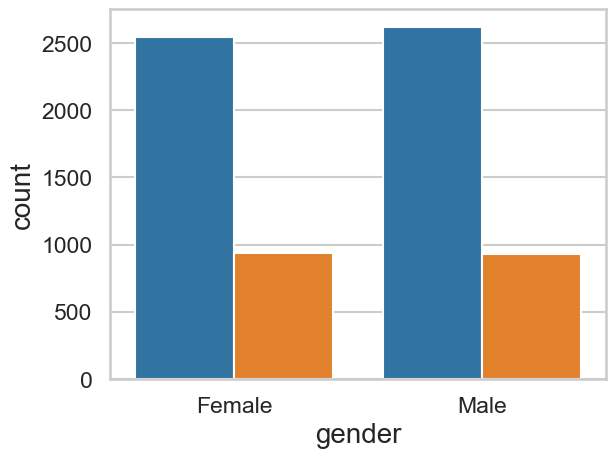

In [57]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')

**Convert the target variable 'Churn' in a binary numeric variable Yes==1 and No==0**

In [ ]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1,0)

In [ ]:
telco_data.head()

**Converting all the categorical variables into dummy variables**

In [ ]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

**Relationship between Monthly Charges and Total Charges**

In [ ]:
sns.lmplot(data=telco_data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [ ]:

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight: Churn is high when Monthly Charges ar high**

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.**

In [ ]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

*Derived Insight: 

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn**

In [ ]:

plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

**Bivariate Analysis**

In [ ]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## **Conclusion**

**These are some of the quick insights from this exercise:**

- **Electronic check medium customers are the highest churners.**  
- **Monthly contract customers are more likely to churn because they have no binding terms (free-to-go customers).**  
- **Customers without Online Security or Tech Support tend to churn more.**  
- **Non–Senior Citizens show a higher churn rate.**



In [ ]:

telco_data_dummies.to_csv('tel_churn.csv')